In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)

In [51]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

In [52]:
x = input_data

In [53]:
for i in range(hidden_layer_size):
    if i!=0:
        x=activations[i-1]
        
    #w = np.random.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    #w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a=np.dot(x,w)
    
    #z = sigmoid(a)
    z = ReLU(a)
    #z = tanh(a)
    
    activations[i] = z

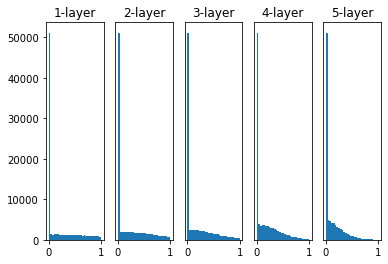

In [54]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    #plt.xlim(0.1, 1)
    #plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [55]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [56]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

In [57]:
# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
std=0.01:2.3025527096312413
Xavier:2.2850110170841447
He:2.2529222475378647
===========iteration:100===========
std=0.01:2.3022359094851295
Xavier:2.240092644353285
He:1.4866479424157766
===========iteration:200===========
std=0.01:2.3013550104643703
Xavier:2.040724528244163
He:0.7582248790703665
===========iteration:300===========
std=0.01:2.301504723104824
Xavier:1.5874815004020832
He:0.43938470538967456
===========iteration:400===========
std=0.01:2.3026494883746333
Xavier:1.1858611704326192
He:0.43843062790705023
===========iteration:500===========
std=0.01:2.301438920636314
Xavier:0.857613814801508
He:0.3899108702440794
===========iteration:600===========
std=0.01:2.3016516878581683
Xavier:0.6078988960784278
He:0.34294737476747916
===========iteration:700===========
std=0.01:2.300460066504589
Xavier:0.4684548775250396
He:0.26490458513764215
===========iteration:800===========
std=0.01:2.3039262996237913
Xavier:0.3802466386998866
He:0.2275435491446

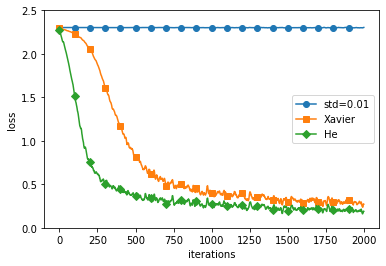

In [58]:
# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()